In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [2]:
df=pd.read_csv('/content/portu_banking_final.csv')

# **Section I : Data Loading**
Part I : Load the dataset into the notebook

Part II : Explore and make note of Attribute Information from UCI

Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

Part IV : What is the ratio of the two classes ? Are they balanced ?

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999.0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
df['y']

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [9]:
df.groupby('y').y.count()

y
0    36548
1     4640
Name: y, dtype: int64

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [11]:
df.previous.unique()

array([0, 2, 1, 3, 4, 5, 7, 6])

In [12]:
df.poutcome.unique()

array(['nonexistent', 'success', 'failure'], dtype=object)


# **Section II : Data Cleaning**
Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances

Part I : Get the dtypes of all the columns of our dataset

Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

Part III : Make note of the deviation in the dataset compared to the description provided by UCI

Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data Part V : Print the cleaned data

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [15]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [16]:
df.age.dtype

dtype('O')

In [17]:
df['age'] =df['age'].astype(str).str[:2]

In [18]:
df['age']=df['age'].astype(int)

In [19]:
df.age.dtype

dtype('int64')

In [20]:
df.age.unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       18, 70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [21]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [22]:
df['job']=df['job'].str.lower()

In [23]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
df.pdays.value_counts()

999.0     39668
3.0         439
6.0         412
4.0         118
9.0          64
2.0          61
7.0          60
12.0         58
10.0         52
5.0          46
13.0         36
11.0         28
1.0          26
15.0         24
14.0         20
8.0          18
0.0          15
16.0         11
17.0          8
18.0          7
9999.0        5
19.0          3
22.0          3
21.0          2
20.0          1
26.0          1
27.0          1
25.0          1
Name: pdays, dtype: int64

In [25]:
df.education.replace("basic-4y","basic.4y" ,inplace=True)

In [26]:
df.education.replace("basic-6y","basic.6y",inplace=True)

In [27]:
df.education.replace("basic-9y","basic.9y", inplace=True)

In [28]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [29]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [30]:
df['pdays'] =df['pdays'].astype(str).str[:3]

In [31]:
df['pdays']=df['pdays'].astype(float)

In [32]:
df.pdays.dtype

dtype('float64')

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [34]:
miss_val = df.isna().sum()
miss_val

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [35]:
df.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [36]:
df.marital.unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [37]:
df['marital'] =df['marital'].astype(str).str[:1]

In [38]:
df['marital']=df['marital'].str.lower()

In [39]:
df['marital'].value_counts()

m    24928
s    11568
d     4612
u       80
Name: marital, dtype: int64


# **Section III : Exploring data with Group by**
In this section , we must create some primitive EDA

Use the groupby function on the mean of the following columns :

I : y

II : job

III : marital

IV : education

Make a note of what you learn from the outputs !

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['marital1']=le.fit_transform(df['marital'])

In [41]:
df['job1']=le.fit_transform(df['job'])

In [42]:
df['education1']=le.fit_transform(df['education'])

In [43]:
df['default1']=le.fit_transform(df['default'])

In [44]:
df['housing1']=le.fit_transform(df['housing'])

In [45]:
df['loan1']=le.fit_transform(df['loan'])

In [46]:
df['contact1']=le.fit_transform(df['contact'])

In [47]:
df['month1']=le.fit_transform(df['month'])

In [48]:
df['day_of_week1']=le.fit_transform(df['day_of_week'])

In [49]:
df['poutcome1']=le.fit_transform(df['poutcome'])

In [50]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital1,job1,education1,default1,housing1,loan1,contact1,month1,day_of_week1,poutcome1
0,44,blue-collar,m,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,2,0,0,1,2,1
1,53,technician,m,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,1,9,7,0,0,0,0,7,0,1
2,28,management,s,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,2,4,6,0,2,0,0,4,2,2
3,39,services,m,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,1,7,3,0,0,0,0,0,0,1
4,55,retired,m,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,1,5,0,0,2,0,0,1,0,2


In [51]:
df_y_mean = df.y.mean()

# map column to set the score with respect to the mean
df.y.map(lambda curr_val: curr_val - df_y_mean)

0       -0.112654
1       -0.112654
2        0.887346
3       -0.112654
4        0.887346
           ...   
41183   -0.112654
41184   -0.112654
41185   -0.112654
41186   -0.112654
41187   -0.112654
Name: y, Length: 41188, dtype: float64

In [52]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital1,job1,education1,default1,housing1,loan1,contact1,month1,day_of_week1,poutcome1
0,44,blue-collar,m,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,2,0,0,1,2,1
1,53,technician,m,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,1,9,7,0,0,0,0,7,0,1
2,28,management,s,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,2,4,6,0,2,0,0,4,2,2
3,39,services,m,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,1,7,3,0,0,0,0,0,0,1
4,55,retired,m,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,1,5,0,0,2,0,0,1,0,2


# **Conclusion**
we can only find correlation for numercial data sowe cannot find job,marital and education for this we have t use catagorial apparoch of EDA

# **Section III : Exploratory Data Analysis**
Let us put Matplotlib to use !

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

Part II : Also create stacked bars to same data columns with respect to

Part III : Explore the age column using a histogram and note down your observations

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'marital1', 'job1',
       'education1', 'default1', 'housing1', 'loan1', 'contact1', 'month1',
       'day_of_week1', 'poutcome1'],
      dtype='object')

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64


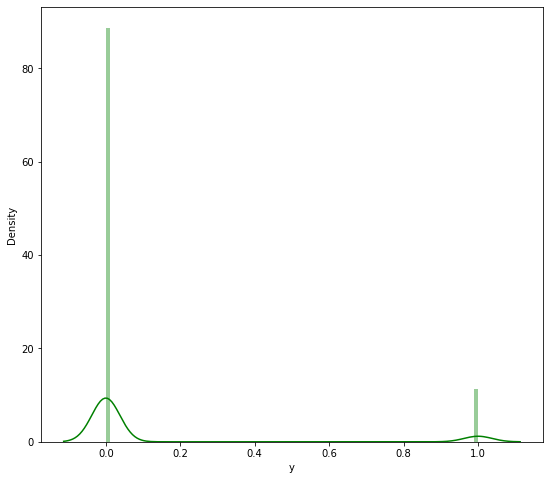

In [94]:
print(df['y'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['y'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(df.dtypes.tolist()))

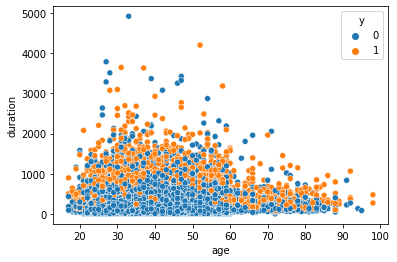

In [97]:
sns.scatterplot(x='age',y='duration',hue='y',data=df)

In [57]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital1,job1,education1,default1,housing1,loan1,contact1,month1,day_of_week1,poutcome1
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,2,0,0,1,2,1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,1,9,7,0,0,0,0,7,0,1
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,2,4,6,0,2,0,0,4,2,2
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,1,7,3,0,0,0,0,0,0,1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,1,5,0,0,2,0,0,1,0,2


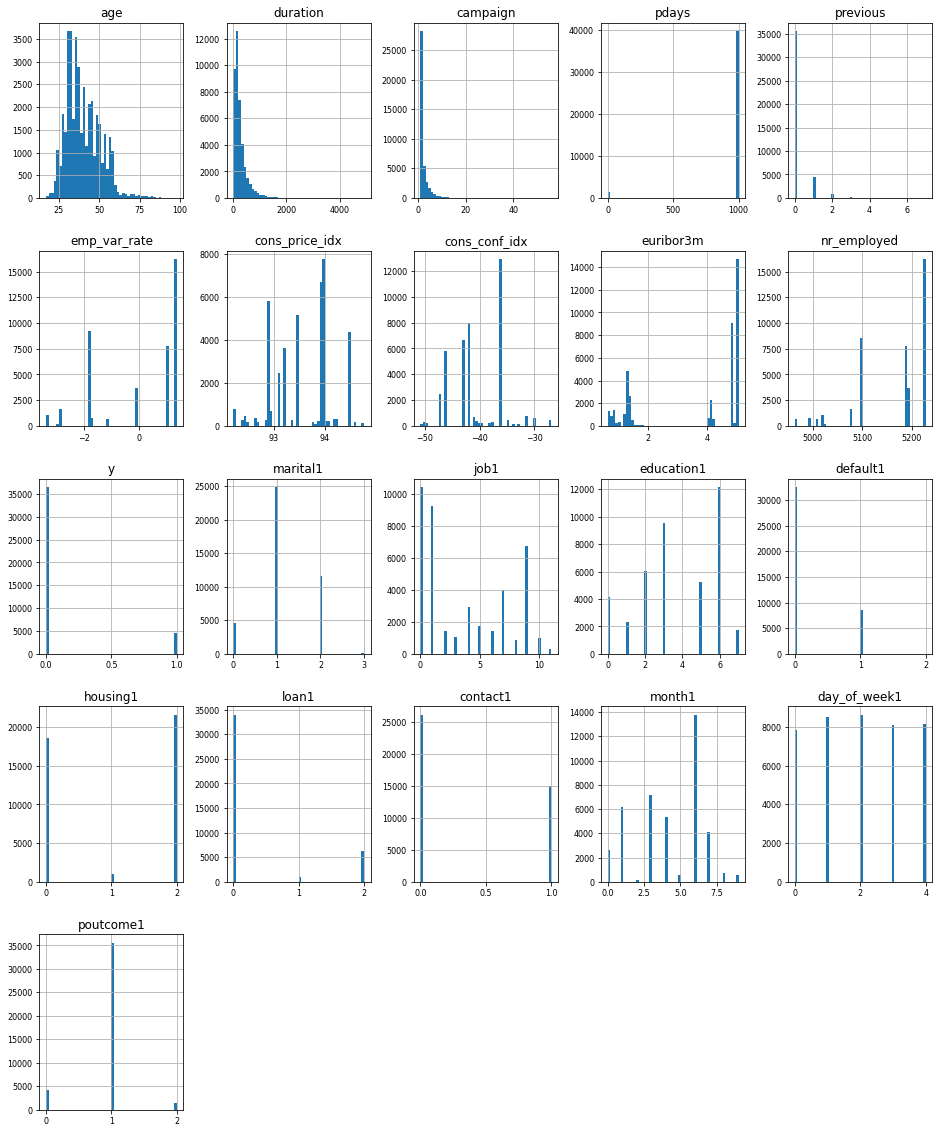

In [58]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [59]:
df_num_corr = df_num.corr()['y'][:] # -1 because the latest row is y
golden_features_list = df_num_corr[abs(df_num_corr) > 0.25].sort_values(ascending=False)
print("There is {} strongly correlated values with y:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with y:
y               1.000000
duration        0.405274
emp_var_rate   -0.298334
euribor3m      -0.307771
pdays          -0.324914
nr_employed    -0.354678
Name: y, dtype: float64


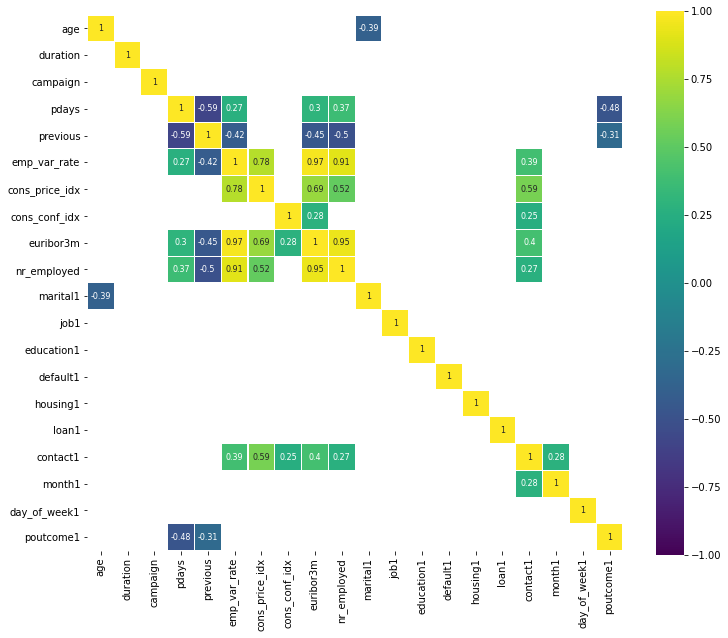

In [60]:
corr = df_num.drop('y', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.25) | (corr <= -0.25)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [61]:
df_not_num = df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 10 non numerical features including:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


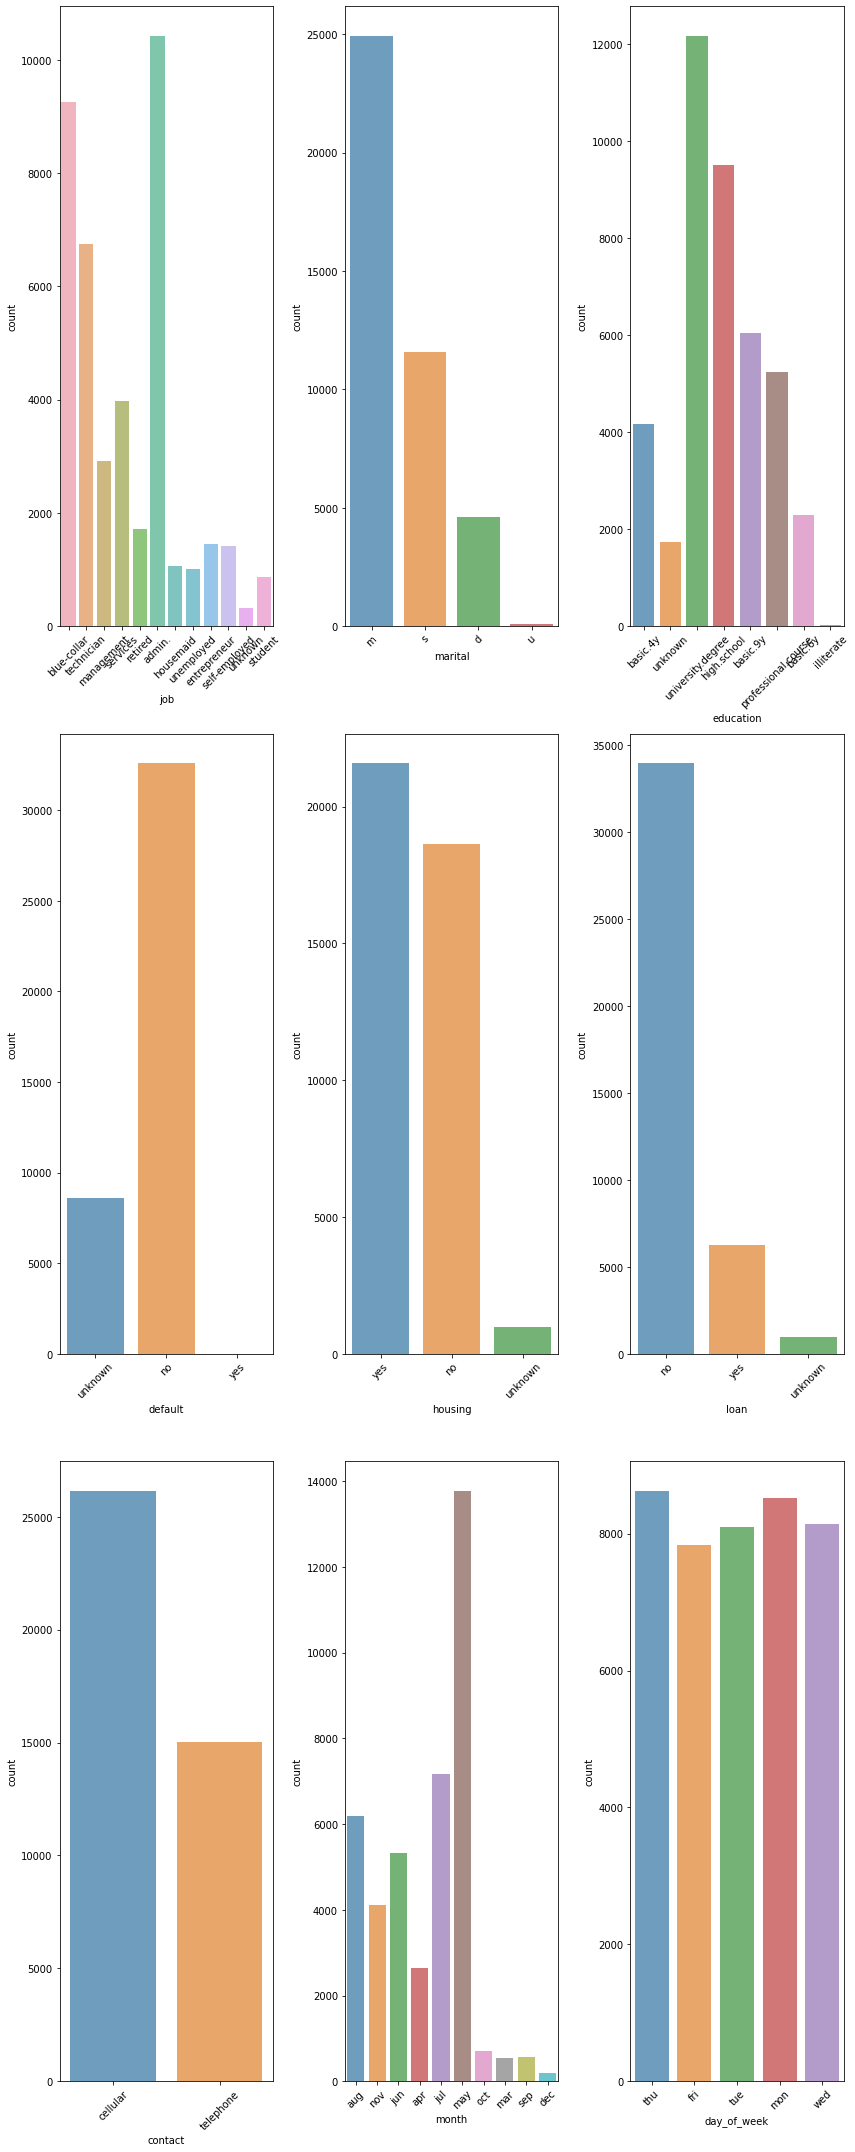

In [62]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

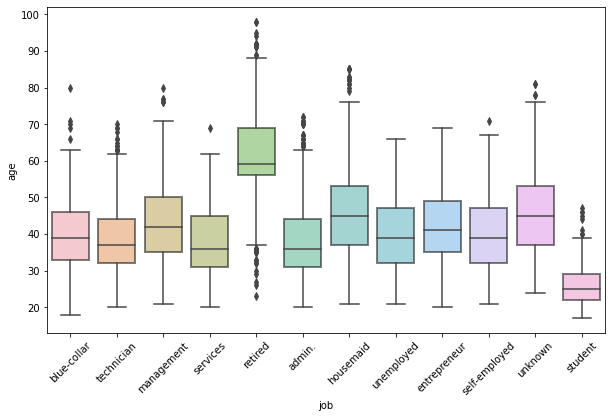

In [63]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='job', y='age', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

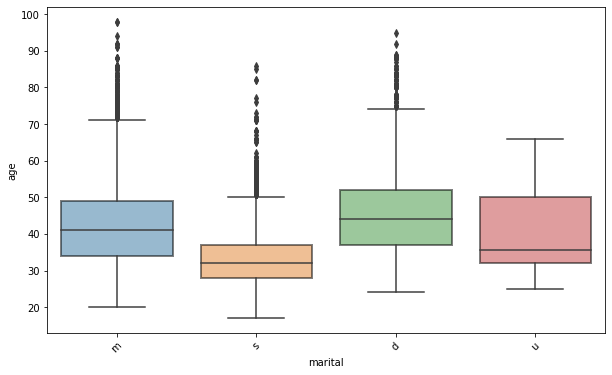

In [64]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='marital', y='age', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

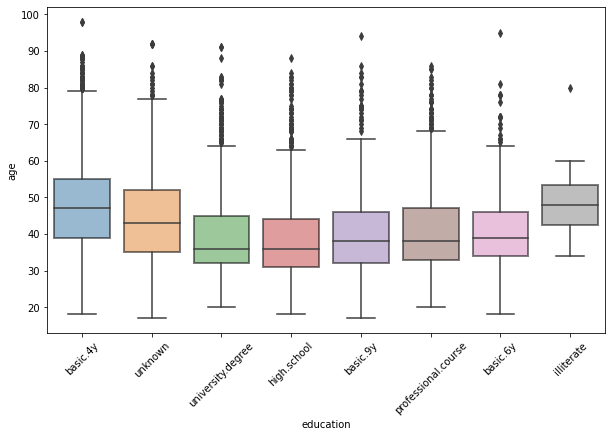

In [65]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='education', y='age', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

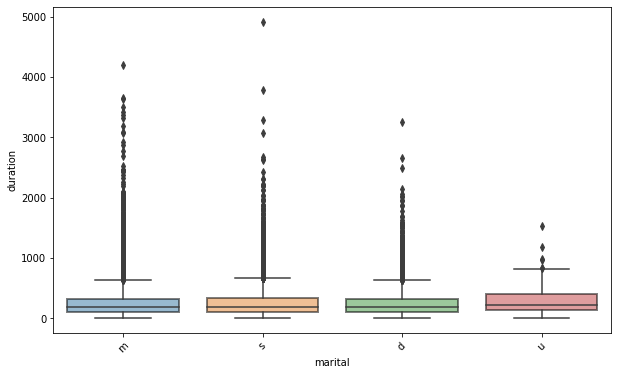

In [66]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='marital', y='duration', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)


# **Section IV : Categorical Variable Encoding**
Part I : Create dummy variables for your categorial variables

part II : Explore your new dataset with these new dummy variables !


# **Section V : Preliminary Training**
Part I : Import your Logisitc Regression libraries

Part II : Split your train and test dataset and train on the data

Part III : Make note of the classification report and other metrics

In [67]:
df.shape

(41188, 31)

In [68]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital1,job1,education1,default1,housing1,loan1,contact1,month1,day_of_week1,poutcome1
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,2,0,0,1,2,1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,1,9,7,0,0,0,0,7,0,1
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,2,4,6,0,2,0,0,4,2,2
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,1,7,3,0,0,0,0,0,0,1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,1,5,0,0,2,0,0,1,0,2


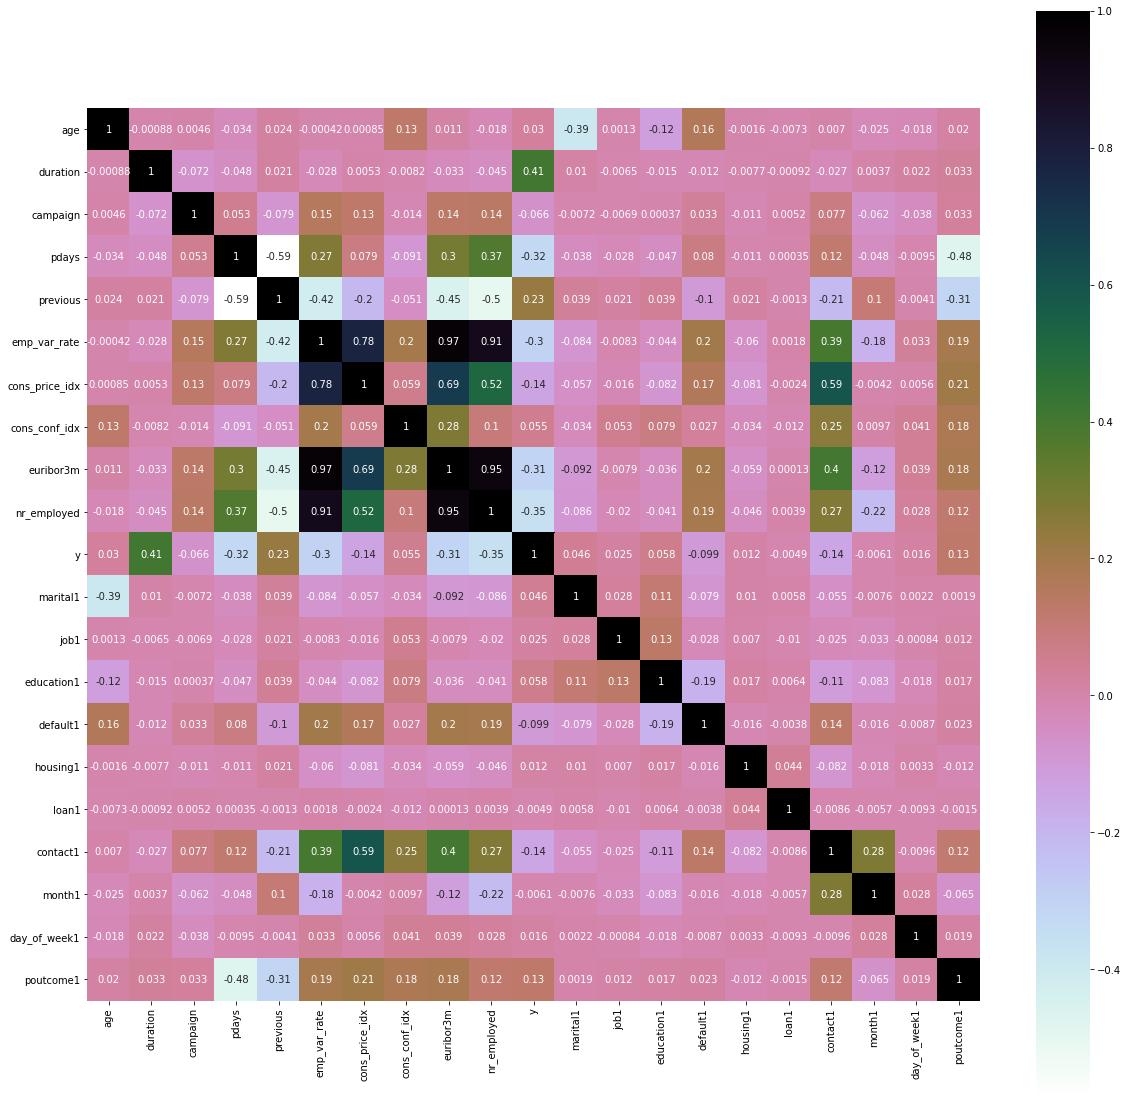

In [69]:
corr = df_num.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [70]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital1,job1,education1,default1,housing1,loan1,contact1,month1,day_of_week1,poutcome1
0,44,blue-collar,m,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,2,0,0,1,2,1
1,53,technician,m,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,1,9,7,0,0,0,0,7,0,1
2,28,management,s,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,2,4,6,0,2,0,0,4,2,2
3,39,services,m,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,1,7,3,0,0,0,0,0,0,1
4,55,retired,m,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,1,5,0,0,2,0,0,1,0,2


In [71]:
df.drop(['marital'],axis=1,inplace=True)
df.drop(['job'],axis=1,inplace=True)
df.drop(['education'],axis=1,inplace=True)
df.drop(['default'],axis=1,inplace=True)
df.drop(['housing'],axis=1,inplace=True)
df.drop(['contact'],axis=1,inplace=True)
df.drop(['month'],axis=1,inplace=True)
df.drop(['day_of_week'],axis=1,inplace=True)
df.drop(['poutcome'],axis=1,inplace=True)

In [72]:
df.drop(['loan'],axis=1,inplace=True)

In [73]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital1,job1,education1,default1,housing1,loan1,contact1,month1,day_of_week1,poutcome1
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,2,0,0,1,2,1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,1,9,7,0,0,0,0,7,0,1
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,2,4,6,0,2,0,0,4,2,2
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,1,7,3,0,0,0,0,0,0,1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,1,5,0,0,2,0,0,1,0,2


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  float64
 4   previous        41188 non-null  int64  
 5   emp_var_rate    41188 non-null  float64
 6   cons_price_idx  41188 non-null  float64
 7   cons_conf_idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr_employed     41188 non-null  float64
 10  y               41188 non-null  int64  
 11  marital1        41188 non-null  int64  
 12  job1            41188 non-null  int64  
 13  education1      41188 non-null  int64  
 14  default1        41188 non-null  int64  
 15  housing1        41188 non-null  int64  
 16  loan1           41188 non-null  int64  
 17  contact1        41188 non-null 

In [75]:
X = df.iloc[:, [1,2,4,6,9,10,13]].values
y = df.iloc[:, 10].values

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

In [79]:
y_pred=classifier.predict(X_test)

In [84]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [86]:
from sklearn import metrics
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))

[[9156    0]
 [   0 1141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9156
           1       1.00      1.00      1.00      1141

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297



In [88]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 1.0
The confusion matrix of Random Forest Model is
[[9156    0]
 [   0 1141]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

In [89]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 1.0
The confusion matrix of Bagging classifier model is
[[9156    0]
 [   0 1141]]


In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 1.0
The confusion matrix of Gradient Boost classifier model is
[[9156    0]
 [   0 1141]]


In [91]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))


The Random forest model accuracy is 1.0
The Adaboost Ensemble model accuracy is 1.0
The Bagging classifier model accuracy is 1.0
The Gradient Boost classifier model accuracy is 1.0
